# Crime categories

In [5]:
#Import the necessary libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import squarify

In [ ]:
#Load the dataset 
crimes = pd.read_csv('/Users/yadavvinamrata/Downloads/Crimes_-_2015_to_2020.csv')

In [3]:
crimes.head()

,ID,Case Number,Date,Block,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Community Area,Year,Updated On,Latitude,Longitude,Location
0,10224738,HY411648,2015-09-05 13:30:00,043XX S WOOD ST,BATTERY,DOMESTIC BATTERY SIMPLE,RESIDENCE,0,1,924,9.0,12.0,61.0,2015,2018-02-10 15:50:01,41.815117,-87.670000,"(41.815117282, -87.669999562)"
1,10224739,HY411615,2015-09-04 11:30:00,008XX N CENTRAL AVE,THEFT,POCKET-PICKING,CTA BUS,0,0,1511,15.0,29.0,25.0,2015,2018-02-10 15:50:01,41.895080,-87.765400,"(41.895080471, -87.765400451)"
2,11646166,JC213529,2018-09-01 00:01:00,082XX S INGLESIDE AVE,THEFT,OVER $500,RESIDENCE,0,1,631,6.0,8.0,44.0,2018,2019-04-06 16:04:43,NaN,NaN,NaN
3,10224740,HY411595,2015-09-05 12:45:00,035XX W BARRY AVE,NARCOTICS,POSS: HEROIN(BRN/TAN),SIDEWALK,1,0,1412,14.0,35.0,21.0,2015,2018-02-10 15:50:01,41.937406,-87.716650,"(41.937405765, -87.716649687)"
4,10224741,HY411610,2015-09-05 13:00:00,0000X N LARAMIE AVE,ASSAULT,SIMPLE,APARTMENT,0,1,1522,15.0,28.0,25.0,2015,2018-02-10 15:50:01,41.881903,-87.755121,"(41.881903443, -87.755121152)"


In [7]:
crimes_per_type = crimes['Primary Type'].value_counts()
crimes_per_type

THEFT                                352089
BATTERY                              289200
CRIMINAL DAMAGE                      168064
ASSAULT                              114338
DECEPTIVE PRACTICE                   110579
OTHER OFFENSE                         98589
NARCOTICS                             84853
BURGLARY                              70576
MOTOR VEHICLE THEFT                   61618
ROBBERY                               59017
CRIMINAL TRESPASS                     37414
WEAPONS VIOLATION                     31717
OFFENSE INVOLVING CHILDREN            13570
PUBLIC PEACE VIOLATION                 9687
CRIM SEXUAL ASSAULT                    6920
INTERFERENCE WITH PUBLIC OFFICER       6837
SEX OFFENSE                            6462
PROSTITUTION                           4531
HOMICIDE                               3855
ARSON                                  2745
CRIMINAL SEXUAL ASSAULT                2192
LIQUOR LAW VIOLATION                   1351
STALKING                        

## Visualizing most predominant primary types of crimes

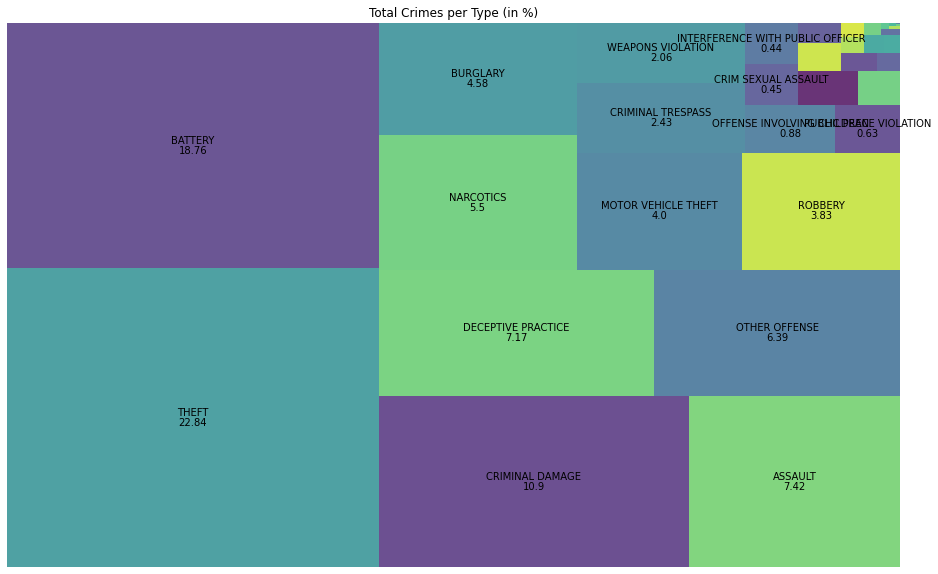

In [33]:
# Plotting a treemap
fig = plt.figure(figsize=(16,10))
squarify.plot(sizes=crimes_per_type.values,
              value=(crimes_per_type.values[:16]*100/crimes_per_type.values.sum()).round(2),
              label=crimes_per_type.index[:16], alpha=.8,
              text_kwargs={'fontsize':10, 'wrap':True})
plt.title('Total Crimes per Type (in %)')
plt.axis('off')
plt.show()

### Only Domestic Crimes by Primary Type

In [51]:
domestic_crimes_per_type = crimes[crimes["Domestic"]==1].groupby('Primary Type').sum()
domestic_crimes_per_type = domestic_crimes_per_type[["Domestic", "Arrest"]]
domestic_crimes_per_type.sort_values("Domestic",ascending=False,inplace=True)
domestic_crimes_per_type

,Domestic,Arrest
Primary Type,,
BATTERY,142270,29369
OTHER OFFENSE,31838,3825
ASSAULT,29535,4827
CRIMINAL DAMAGE,19847,2319
THEFT,13445,688
OFFENSE INVOLVING CHILDREN,7397,1094
CRIMINAL TRESPASS,1941,624
CRIM SEXUAL ASSAULT,1175,226
ROBBERY,1080,117


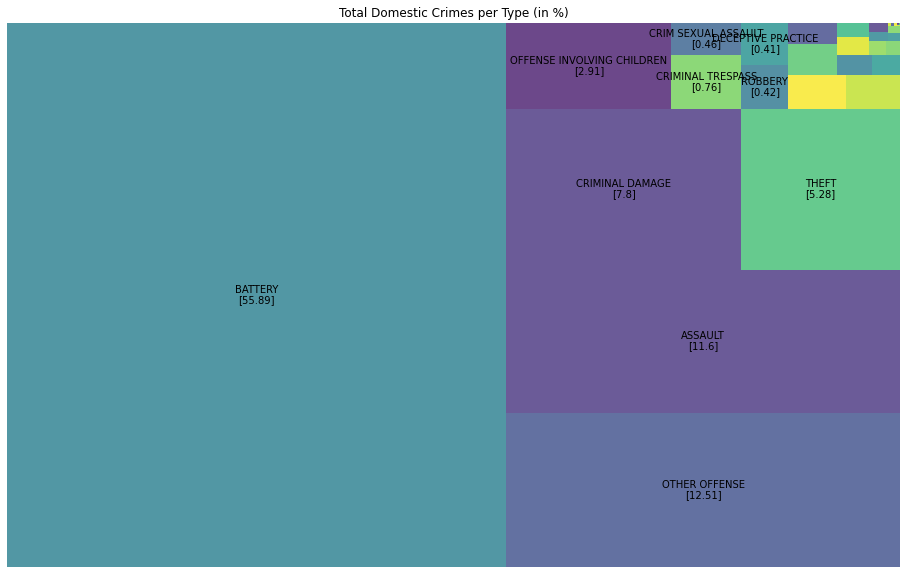

In [57]:
# Plotting a treemap
only_domestic = domestic_crimes_per_type[["Domestic"]]

fig = plt.figure(figsize=(16,10))
squarify.plot(sizes=only_domestic.values,
              value=(only_domestic.values*100/only_domestic.values.sum()).round(2)[:10],
              label=only_domestic.index[:10], alpha=.8,
              text_kwargs={'fontsize':10, 'wrap':True})
plt.title('Total Domestic Crimes per Type (in %)')
plt.axis('off')
plt.show()